# Synthesis
## Additive Synthesis

When we create new sounds out of the *addition* of basic sinusoids, that's called additive synthesis. Let's review some basic "recipes" for some familiar waveforms that are the result of basic additive synthesis. That is, we'll build everything by combining simple sinusoids.

Recall the basic formula for a real-valued sinusoid:

$$ A\ sin(\omega_{0}t + \phi)$$




In [1]:
import numpy as np
from IPython.display import Audio
#%run hide_toggle.ipynb
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

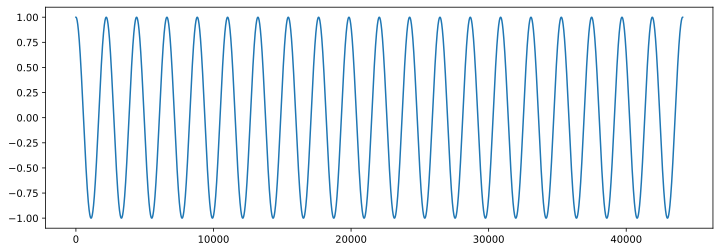

In [2]:
A = 1.0
fs = 44100
f0 = 20
s = 1
t = np.arange(0,fs*s)
phi = np.pi/2

tone = A * np.sin(2 * np.pi * f0 * t/fs + phi)

plt.plot(tone)

In [3]:
def genSine(f=None, t=1, A=1, phi=0, fs=44100):
    """
    Inputs:
    A (float) = amplitude of the sinusoid
    f (float) = frequency of the sinusoid in Hz
    phi (float) = initial phase of the sinusoid in radians
    fs (float) = sampling frequency of the sinusoid in Hz
    t (float) = duration of the sinusoid (in seconds)
    Output:
    The function should return a numpy array
    x (numpy array) = The generated sinusoid (use np.cos())
    """
    import numpy as np
    A = float(A)
    f = float(f) 
    float(phi)
    fs = float(fs)
    t = float(t) 
    
    x = A * np.sin(2*np.pi*f*np.arange(0,t,1/fs) + phi)
    return(x)

#hide_toggle()

In [19]:
x = genSine(80)

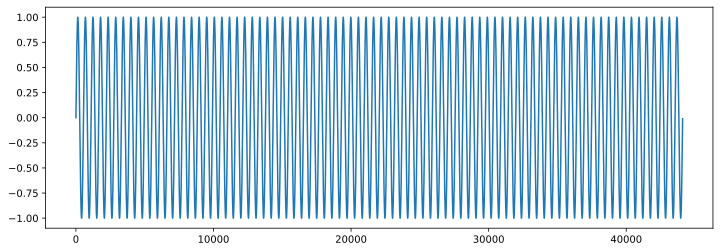

In [20]:
plt.plot(x)

In [23]:
Audio(x, rate=44100)

In [24]:
y = genSine(110)

In [25]:
Audio(y, rate=44100)

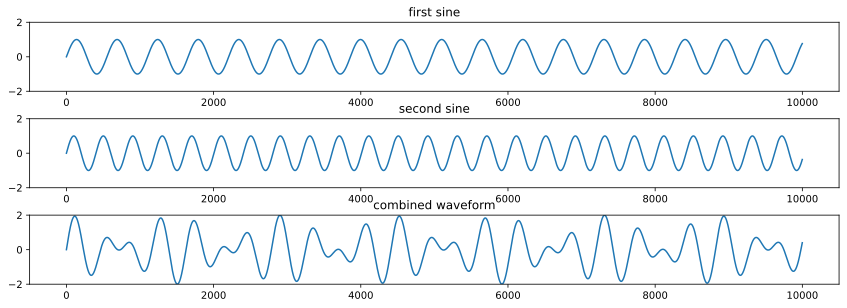

In [9]:
z = x + y

plt.subplot(3,1,1)
plt.tight_layout()
plt.plot(x[0:10000])
plt.ylim((-2,2))
plt.title('first sine')

plt.subplot(3,1,2)
plt.plot(y[0:10000])
plt.ylim((-2,2))
plt.title('second sine')

plt.subplot(3,1,3)
plt.plot(z[0:10000])
plt.ylim((-2,2))
plt.title('combined waveform')

hide_toggle()

In [26]:
Audio(z, rate=44100) #listen to combined sinusoid

In [11]:
from IPython.display import Image
Image(url="https://hackster.imgix.net/uploads/attachments/537944/image_KipMQodplQ.png?auto=compress%2Cformat&w=1280&h=960&fit=max")

The resulting audio of two sounds added together will always equal (percpetually) those two independent sounds now sounding simultaneously. (However, if the sinusoids are integer multiples of each other, they may be perceived as a single sound with multiple harmonics.)

We can demonstrate this with real audio samples:

In [22]:
(fs, x) = read('../uploaded_audio/flute-A4.wav')
(fs2, x2) = read('../uploaded_audio/cello-double.wav')
Audio(x, rate=44100)

In [27]:
x2 = x2[0:x.size]
Audio(x2, rate=44100)

In [14]:
z = x + x2
Audio(z, rate=44100)

## Complex Tones

A complex tone is any signal that can be described as periodic, and as made up of more than one sinusoidal component.

## Pitch perception of *complex* tones

### Harmonic signals
* A periodic (repeating) signal with harmonics. **Harmonics** are partials that relate to the fundamental frequency in **integer ratios**
* Lowest harmonic is called the fundamental frequency and usually corresponds to the perceived pitch
* Periodic sounds give rise to sensation of clear pitch

In [17]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Harmonic_partials_on_strings.svg/800px-Harmonic_partials_on_strings.svg.png', width=400)

![Alt text](https://upload.wikimedia.org/wikipedia/commons/b/b7/Harmonic_spectra_theoretical_x_y.png)

### Inharmonic signals

* Inharmonic signals generate complex tones that technically have partials, not harmonics. **Partials** are sinusoidal components but that exist in non-integer multiples of the fundamental. Because they are no longer harmonically related to the fundamental, we do not call them harmonics.
* E.g.: bells, tympani. Imprecise overall pitch; can have pitch corresponding to dominant partial or even several pitches
*  These generate waveforms that are not clearly periodic, but can still be described as a series of superimposed sinusoids.

In [16]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/f/f7/Bell_inharmonic_spectrum.png', width=600)

### Noise & Non-Musical Sounds

* E.g., white noise, cymbals
* Dog barking
* Aperiodic signal (random temporal representation - waveform does not clearly repeat). **Does not convey the perception of pitch.**

* Although some sound sources have single-frequency components, most sound sources
produce a very disordered and random waveform of amplitude versus time. 

**ALL complex sounds can be represented as a sum of sinusoidal signals or *components*.** 
The process by which a complex wave is decomposed (broken up) into a set of component sinusoids is referred to as Fourier analysis. (Coming later in the semester.)

We can create simple "recipes" for the most basic of complex waveforms, which are the combination of specific combinations of a fundamental sinusoid and various integer multiples (in Hz)

Below is a table for comparing a pure tone, and 3 complex (artificial) waveforms, showing which harmonics are present and at which amplitudes:

| Waveshape | a1 | a2 | a3| a4| a5| a6| a7 | a8 | a9 | aN | General Rule |
| ---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |:---: | :------------------: |
| Sine | 1 | 0 | 0 | 0 | 0 |0 | 0 | 0 | 0 | ... | $f0$ only |
| Sawtooth | 1 | 1/2 | 1/3 | 1/4 | 1/5 | 1/6 | 1/7 | 1/8 | 1/9 | ... |$1/x$ |
| Square | 1 | 0 | 1/3 | 0 | 1/5 | 0 | 1/7 | 0 | 1/9 | ... |$1/x$ for odd $x$ |
| Triangle |  1 | 0 | -1/9 | 0 | 1/25 | 0 | -1/49 | 0 | 1/81 | ... |$1/x^2$ for odd $x$, alternating + and - | 